# **CAR PRICE PREDICTION**

# **Import libraries**

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Read and Explore Data**

In [85]:
df=pd.read_csv('/content/car data.csv')
df.sample(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
102,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0


In [86]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [87]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [88]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [89]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# **Data Preprocessing**

In [91]:
df.drop(['Owner'],axis=1,inplace=True)

In [92]:
le=LabelEncoder()
df['Car_Name']=le.fit_transform(df['Car_Name'])
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Selling_type']=le.fit_transform(df['Selling_type'])
df['Transmission']=le.fit_transform(df['Transmission'])
df.sample(3)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
111,48,2016,1.15,1.50,8700,2,1,1
36,73,2015,4.65,7.20,48767,2,0,1
138,32,2016,0.60,0.87,15000,2,1,1


# **Data Visualization**

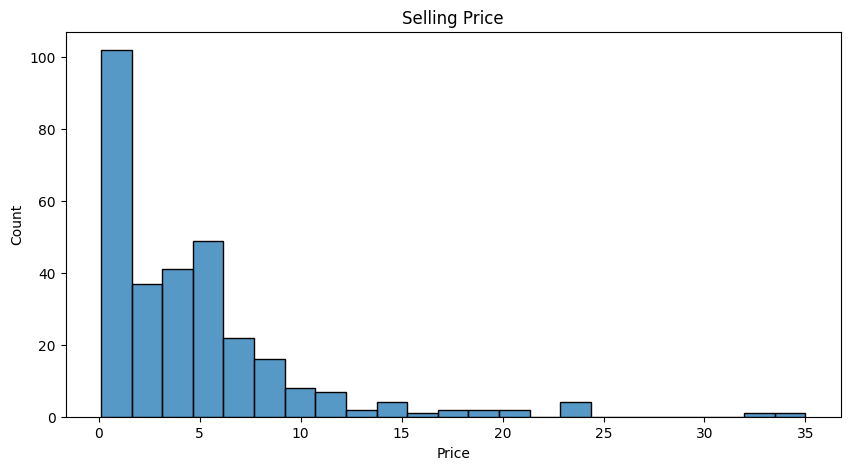

In [93]:
plt.figure(figsize=(10,5))
sns.histplot(df['Selling_Price'])
plt.title('Selling Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


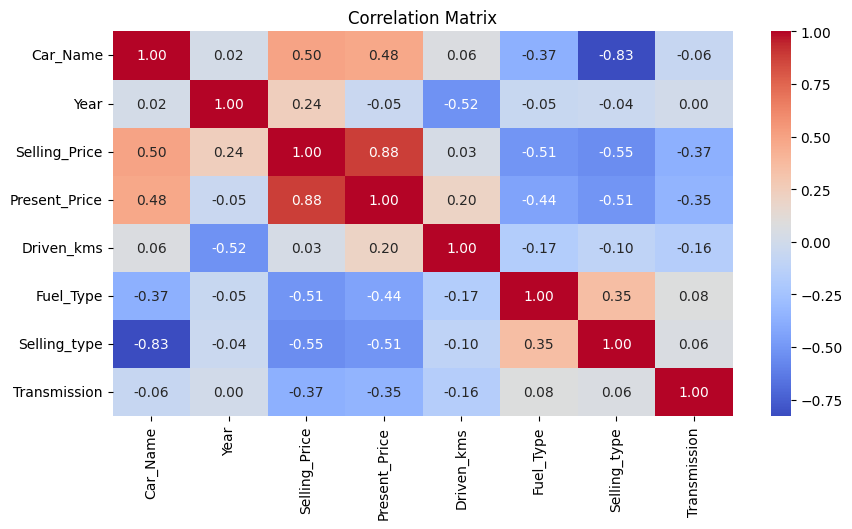

In [94]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

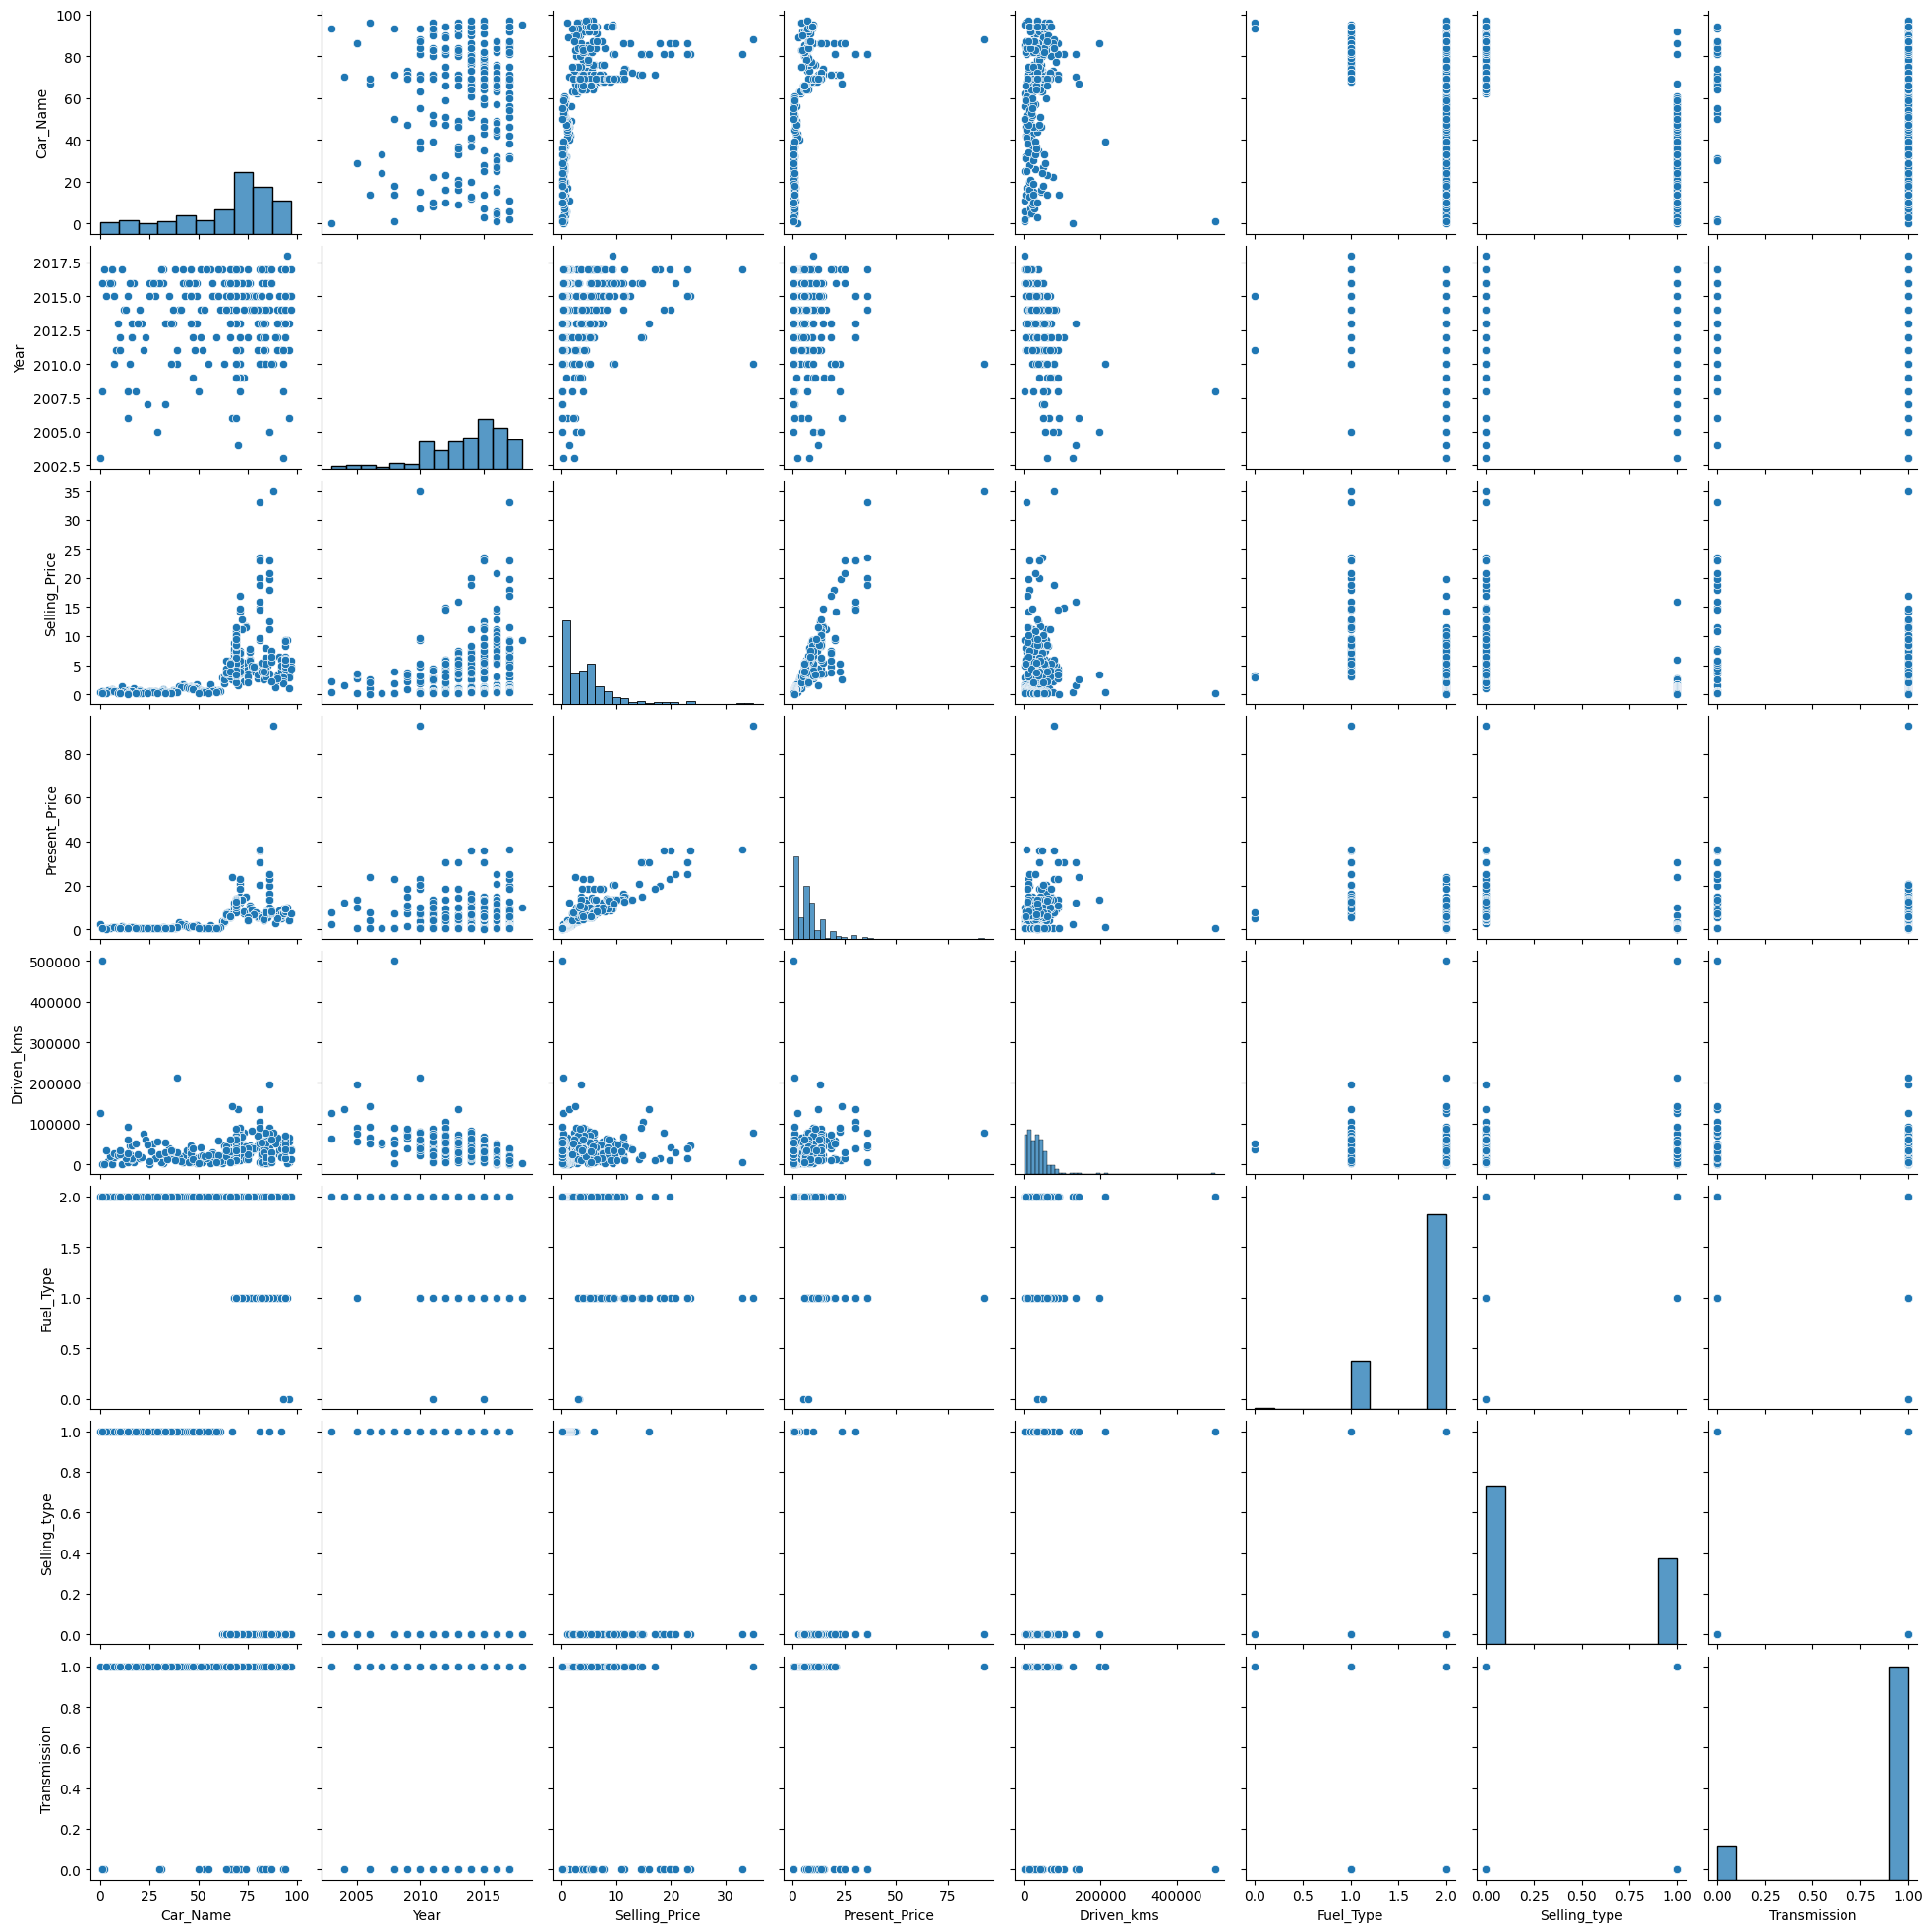

In [95]:
sns.pairplot(df)
plt.show()

# **Training and Testing Data**

In [96]:
x=df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price']

In [97]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((210, 7), (91, 7), (210,), (91,))

# **Train LinearRegression Model**

In [98]:
LR=LinearRegression()

In [99]:
LR.fit(xtrain,ytrain)

LinearRegression()

In [100]:
LR_pred=LR.predict(xtest)

In [112]:
mae = mean_absolute_error(ytest, LR_pred)
mse = mean_squared_error(ytest, LR_pred)
rmse = mse ** 0.5
r2 = r2_score(ytest, LR_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 1.216105853700749
MSE: 3.372135653277435
RMSE: 1.836337565176249
R2 Score: 0.8815722448872328


# **Train DecisionTree Model**

In [102]:
DT=DecisionTreeRegressor()

In [103]:
DT.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [104]:
DT_pred=DT.predict(xtest)

In [113]:
mae = mean_absolute_error(ytest, DT_pred)
mse = mean_squared_error(ytest, DT_pred)
rmse = mse ** 0.5
r2 = r2_score(ytest, DT_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.6305494505494506
MSE: 1.1275164835164835
RMSE: 1.0618457908361663
R2 Score: 0.9604021724731865


# **Train RandomForest Model**

In [108]:
RFR=RandomForestRegressor()

In [109]:
RFR.fit(xtrain,ytrain)

RandomForestRegressor()

In [110]:
RFR_pred=RFR.predict(xtest)

In [114]:
mae = mean_absolute_error(ytest, RFR_pred)
mse = mean_squared_error(ytest, RFR_pred)
rmse = mse ** 0.5
r2 = r2_score(ytest, RFR_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.6187593406593408
MSE: 1.0932831915384622
RMSE: 1.0456018322183938
R2 Score: 0.9616044289468063
